# Narratives and Insights from the Dataset
This notebook performs data transformation, summarization, and visualization to uncover actionable insights from the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/gllani/Downloads/Alzheimer_s_Disease_and_Healthy_Aging_Data_20241203.csv'
data = pd.read_csv(file_path)

## Step 1: Data Transformation

In [2]:
data.rename(columns={
    'YearStart': 'Start_Year',
    'YearEnd': 'End_Year',
    'LocationAbbr': 'State_Abbr',
    'LocationDesc': 'State_Name',
    'Data_Value': 'Value',
    'Stratification1': 'Stratification_Group1',
    'Stratification2': 'Stratification_Group2'
}, inplace=True)

data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
data['Value'].fillna(data['Value'].median(), inplace=True)

/var/folders/38/1125z18d2g91tz6qydztz_540000gn/T/ipykernel_83676/2100057949.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Value'].fillna(data['Value'].median(), inplace=True)


## Step 2: Summarize Key Features

In [3]:
summary = data.describe()

unique_values = {col: data[col].nunique() for col in data.select_dtypes(include='object').columns}

print("Numeric Summary:")
print(summary)
print("\nUnique values in categorical columns:")
print(unique_values)

Numeric Summary:
          Start_Year       End_Year          Value  Data_Value_Alt  \
count  284142.000000  284142.000000  284142.000000   192808.000000   
mean     2018.596065    2018.657735      36.109182       37.676757   
std         2.302815       2.360105      20.894067       25.213484   
min      2015.000000    2015.000000       0.000000        0.000000   
25%      2017.000000    2017.000000      24.200000       15.900000   
50%      2019.000000    2019.000000      32.800000       32.800000   
75%      2021.000000    2021.000000      42.400000       56.900000   
max      2022.000000    2022.000000     100.000000      100.000000   

       Low_Confidence_Limit  High_Confidence_Limit     LocationID  
count         192597.000000          192597.000000  284142.000000  
mean              33.027824              42.595333     800.322677  
std               24.290016              26.156408    2511.564977  
min               -0.700000               1.300000       1.000000  
25%         

## Step 3: Visualizations

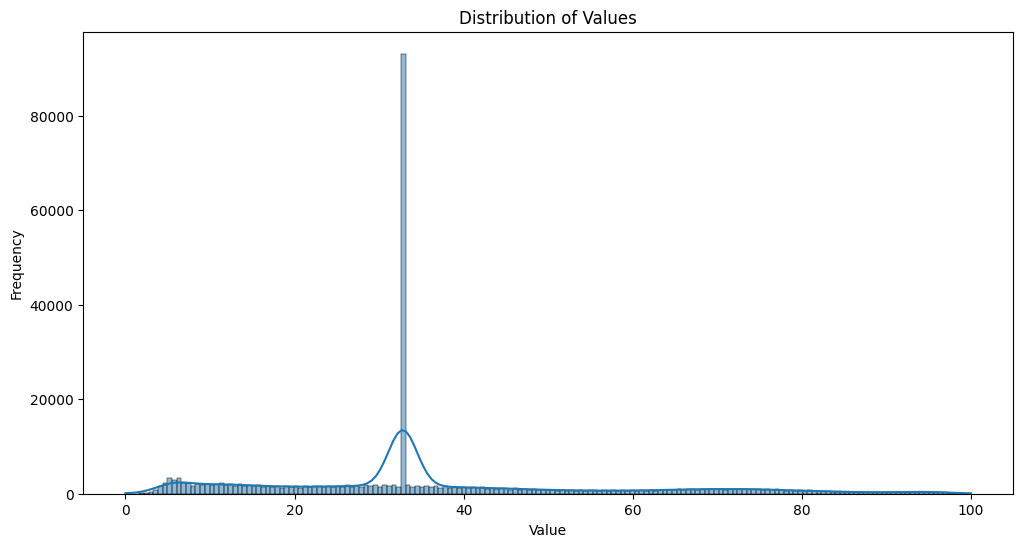

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Value'], kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

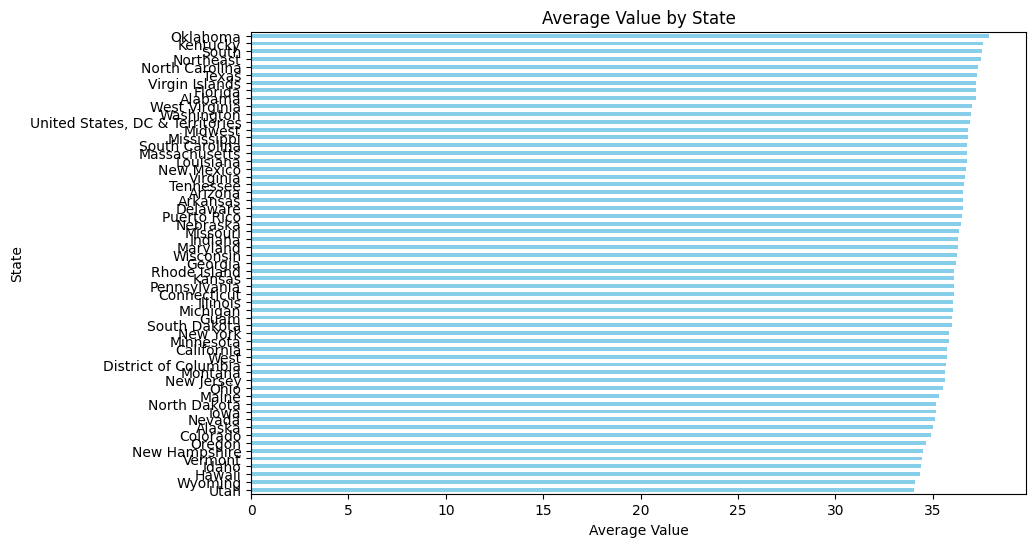

In [5]:
plt.figure(figsize=(10, 6))
geo_data = data.groupby('State_Name')['Value'].mean().sort_values()
geo_data.plot(kind='barh', color='skyblue')
plt.title('Average Value by State')
plt.xlabel('Average Value')
plt.ylabel('State')
plt.show()

## Save the Transformed Dataset

In [6]:
data.to_csv('transformed_dataset.csv', index=False)